In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('~/Downloads/Conferences/Combined_CSV/ACC_combined/fsucombined.csv')
print(data.columns)


Index(['PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher',
       'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter',
       ...
       'ThrowTrajectoryZc1', 'ThrowTrajectoryZc2', 'PitchReleaseConfidence',
       'PitchLocationConfidence', 'PitchMovementConfidence',
       'HitLaunchConfidence', 'HitLandingConfidence',
       'CatcherThrowCatchConfidence', 'CatcherThrowReleaseConfidence',
       'CatcherThrowLocationConfidence'],
      dtype='object', length=167)


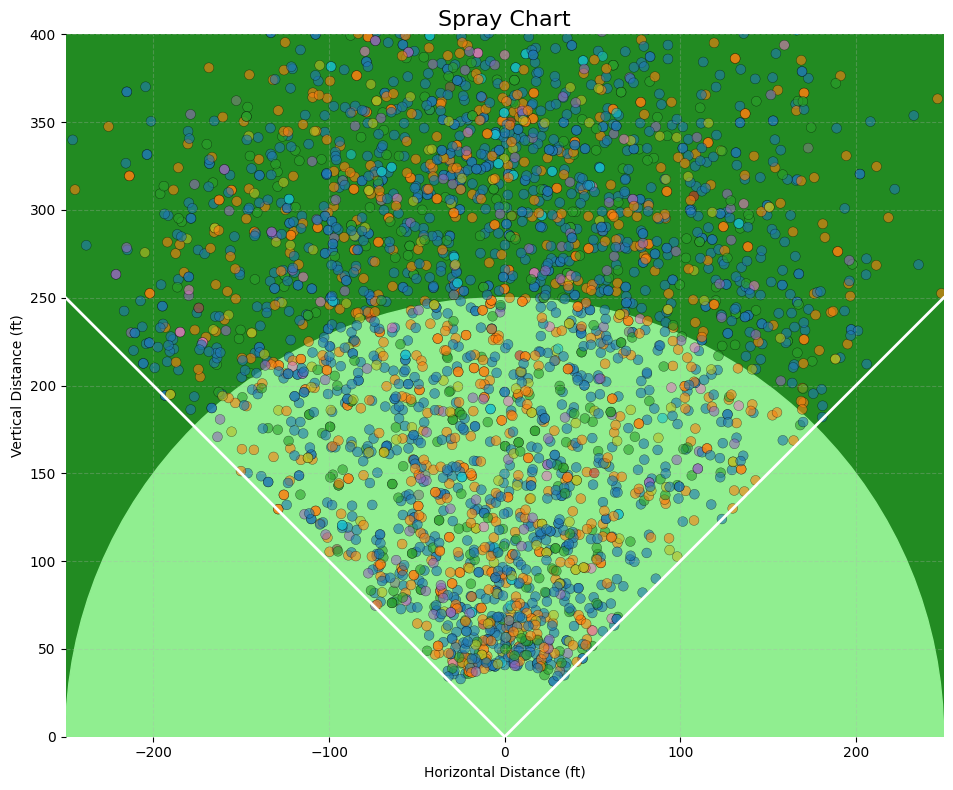

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fair_data = data[
    (data['Direction'] >= -45) &
    (data['Direction'] <= 45) &
    (data['Distance'] >= 40)
].dropna(subset=['Distance'])

fair_data['Direction_rad'] = np.deg2rad(fair_data['Direction'])
fair_data['SprayX'] = fair_data['Distance'] * np.sin(fair_data['Direction_rad'])
fair_data['SprayY'] = fair_data['Distance'] * np.cos(fair_data['Direction_rad'])


ax.scatter(
    fair_data['SprayX'],
    fair_data['SprayY'],
    color= 'red',
    alpha=0.6,
    edgecolor='black',
    linewidth=0.3,
    s=50
)


fig, ax = plt.subplots(figsize=(12, 8))

outfield = plt.Circle((0, 0), 250, color='lightgreen', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='white', linewidth=2)  # Left foul line
ax.plot([0, 250], [0, 250], color='white', linewidth=2)   # Right foul line

ax.scatter(
    fair_data['SprayX'], 
    fair_data['SprayY'], 
    color=colors, 
    alpha=0.6, 
    edgecolor='black', 
    linewidth=0.3,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('#228B22')
sns.despine(left=True, bottom=True)

plt.title('Spray Chart', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
filtered_df = data[data['Date'].str.contains('2023-02-17', na=False)]
filtered_df.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1,2023-02-17,17:02:55.11,1,1,"Montgomery, Carson",691000,Right,FLO_SEM,"Cone, Jack",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
1,2,2023-02-17,17:03:13.10,1,2,"Montgomery, Carson",691000,Right,FLO_SEM,"Cone, Jack",...,NaN,NaN,High,High,High,High,High,NaN,NaN,NaN
2,3,2023-02-17,17:03:59.38,2,1,"Montgomery, Carson",691000,Right,FLO_SEM,"Dunaway, Mason",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
3,4,2023-02-17,17:04:21.30,2,2,"Montgomery, Carson",691000,Right,FLO_SEM,"Dunaway, Mason",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
4,5,2023-02-17,17:04:41.07,2,3,"Montgomery, Carson",691000,Right,FLO_SEM,"Dunaway, Mason",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN


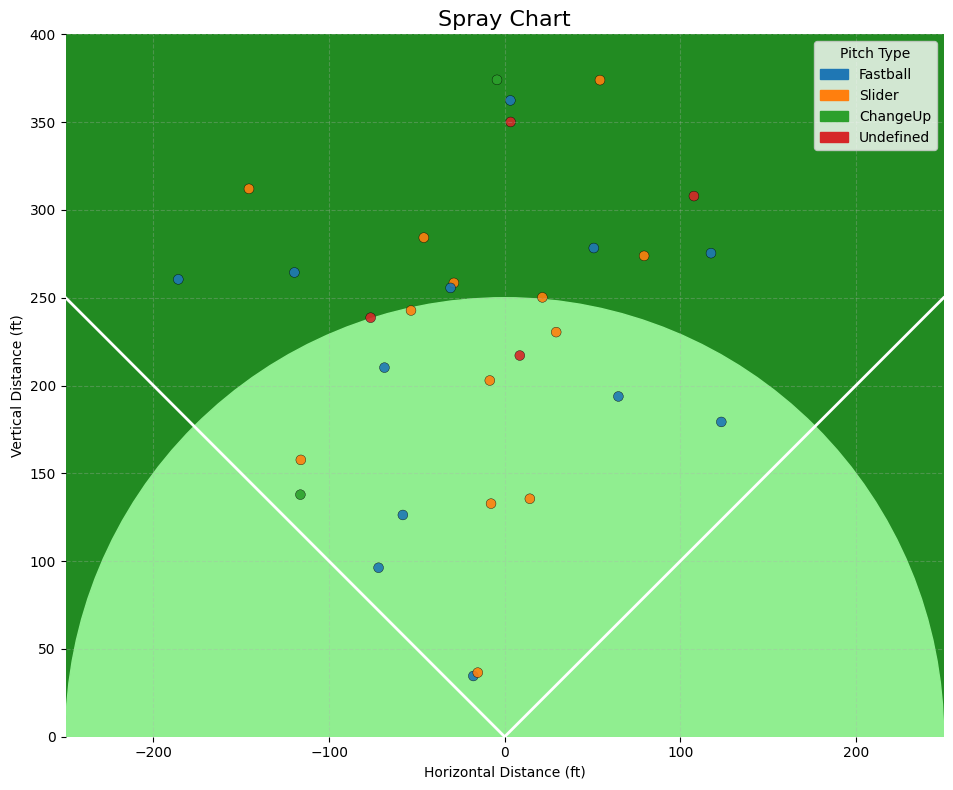

In [22]:
from matplotlib.patches import Patch
fair_data = filtered_df[
    (filtered_df['Direction'] >= -45) &
    (filtered_df['Direction'] <= 45) &
     (filtered_df['Distance'] >= 30)
].dropna(subset=['Distance'])

fair_data['Direction_rad'] = np.deg2rad(fair_data['Direction'])
fair_data['SprayX'] = fair_data['Distance'] * np.sin(fair_data['Direction_rad'])
fair_data['SprayY'] = fair_data['Distance'] * np.cos(fair_data['Direction_rad'])

pitch_types = fair_data['TaggedPitchType'].unique()
palette = dict(zip(pitch_types, sns.color_palette(n_colors=len(pitch_types))))
colors = fair_data['TaggedPitchType'].map(palette)

fig, ax = plt.subplots(figsize=(12, 8))

outfield = plt.Circle((0, 0), 250, color='lightgreen', fill=True, zorder=0)
ax.add_artist(outfield)
ax.plot([0, -250], [0, 250], color='white', linewidth=2)  # Left foul line
ax.plot([0, 250], [0, 250], color='white', linewidth=2)   # Right foul line

ax.scatter(
    fair_data['SprayX'], 
    fair_data['SprayY'], 
    color= colors, 
    alpha=0.9, 
    edgecolor='black', 
    linewidth=0.3,
    s=50
)

ax.set_xlim(-250, 250)
ax.set_ylim(0, 400)
ax.set_aspect('equal')
ax.set_facecolor('#228B22')
sns.despine(left=True, bottom=True)

legend_handles = [Patch(color=palette[p], label=p) for p in pitch_types]
ax.legend(handles=legend_handles, title='Pitch Type', loc='upper right')

plt.title('Spray Chart', fontsize=16)
plt.xlabel('Horizontal Distance (ft)')
plt.ylabel('Vertical Distance (ft)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()